# Exploratory Data Analysis (EDA)

In [53]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Membaca Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("/content/drive/MyDrive/Data Science/Dataset/cleveland_heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## Menampilkan Ringkasan Data



1.   age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
  * -- Value 0: typical angina
  * -- Value 1: atypical angina
  * -- Value 2: non-anginal pain
  * -- Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
  * -- Value 0: normal
  * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
  * -- Value 0: upsloping
  * -- Value 1: flat
  * -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
14. condition: 0 = no disease, 1 = disease



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
print("Shape of Dataset:", df.shape, "\n")
print("Data Types:\n", df.dtypes, "\n")
print("Missing Values:\n", df.isnull().sum(), "\n")
print("Descriptive Statistics:\n", df.describe())

Shape of Dataset: (297, 14) 

Data Types:
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object 

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64 

Descriptive Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  1

## Data Cleaning & Outliers Detection

In [35]:
# Mengganti nama kolom 'condition' menjadi 'target'
df.rename(columns={'condition': 'target'}, inplace=True)

In [21]:
# Menangani Nilai Hilang
df = df.fillna(df.median())  # atau gunakan metode yang sesuai seperti dropna(), fillna('value'), dll.

In [22]:
# Deteksi dan Penanganan Outlier
# Menggunakan Z-score untuk deteksi outlier
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
print("Outliers Detected:\n", outliers)

Outliers Detected:
 (array([ 45,  79,  83, 164, 180, 186, 234, 238, 239]), array([3, 4, 4, 7, 4, 9, 3, 4, 9]))


In [ ]:
# Hapus outliers jika diperlukan
df = df[(z_scores < 3).all(axis=1)]


## Visualisasi Data

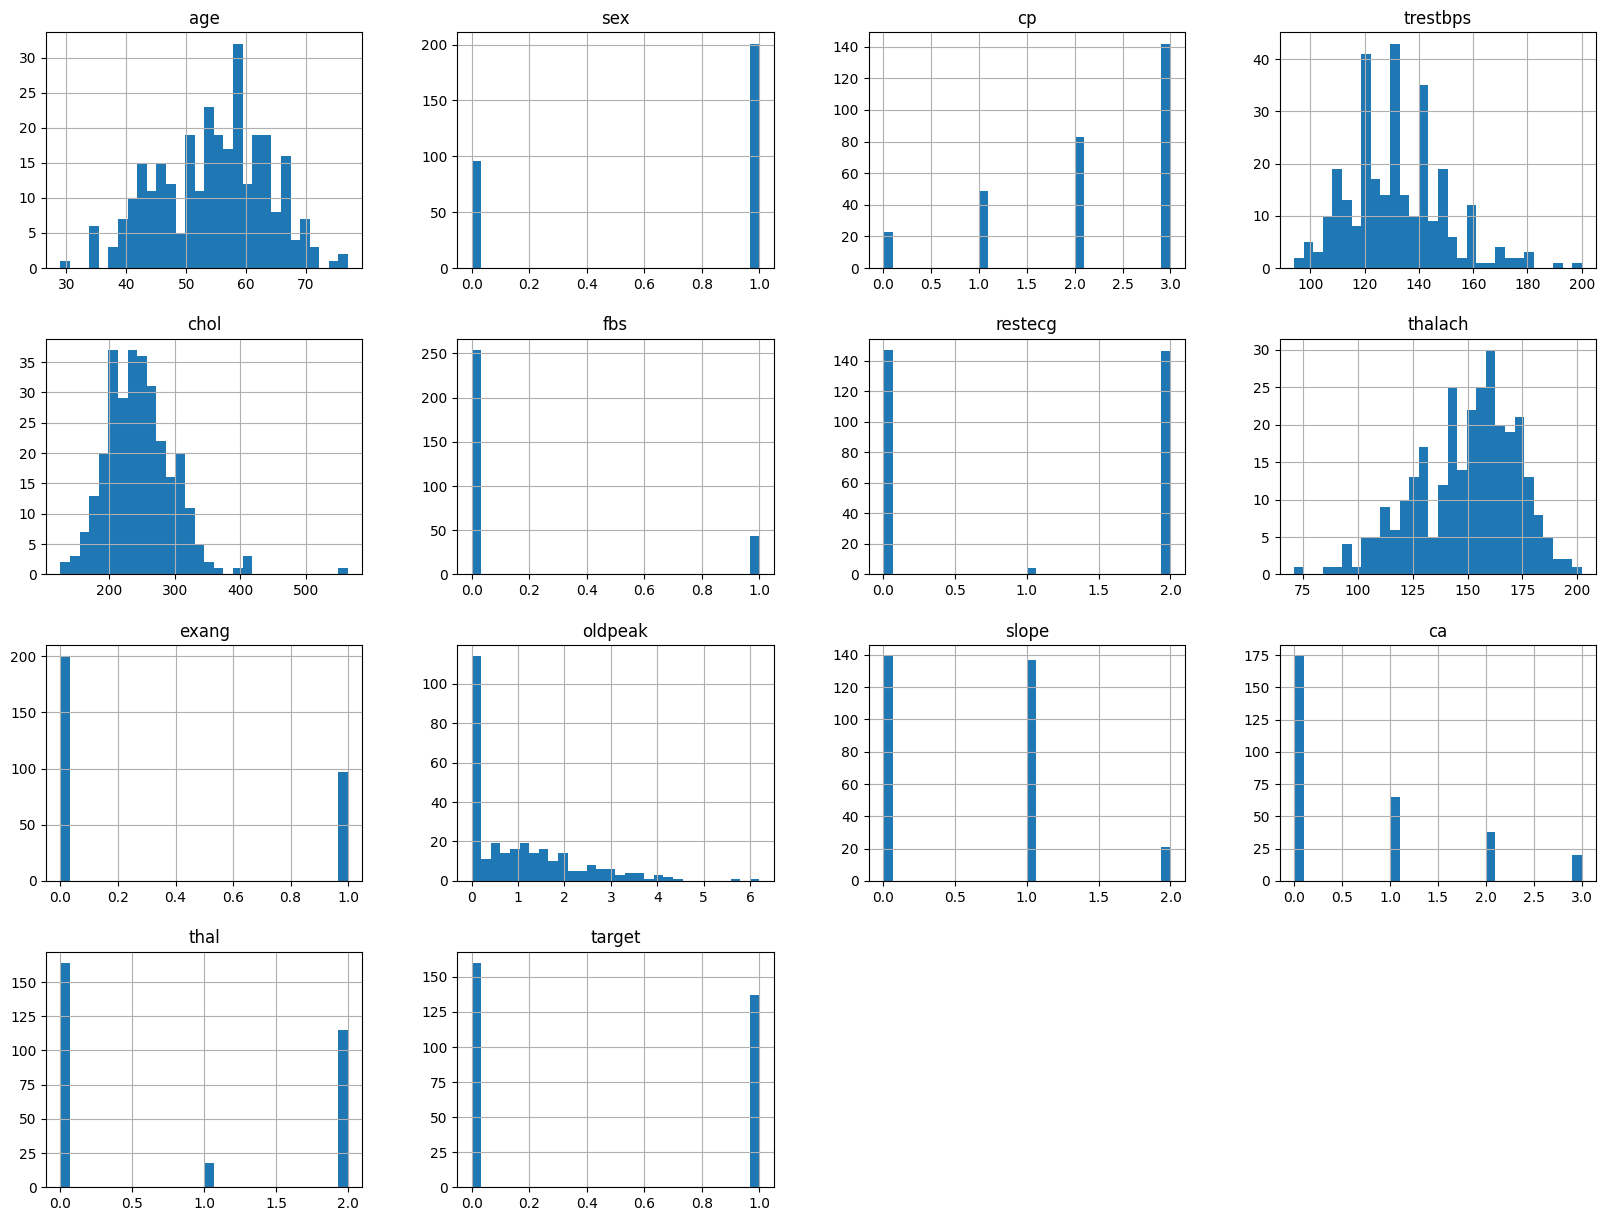

In [36]:
# Distribusi Variabel Numerik
df.hist(bins=30, figsize=(20, 15))
plt.show()

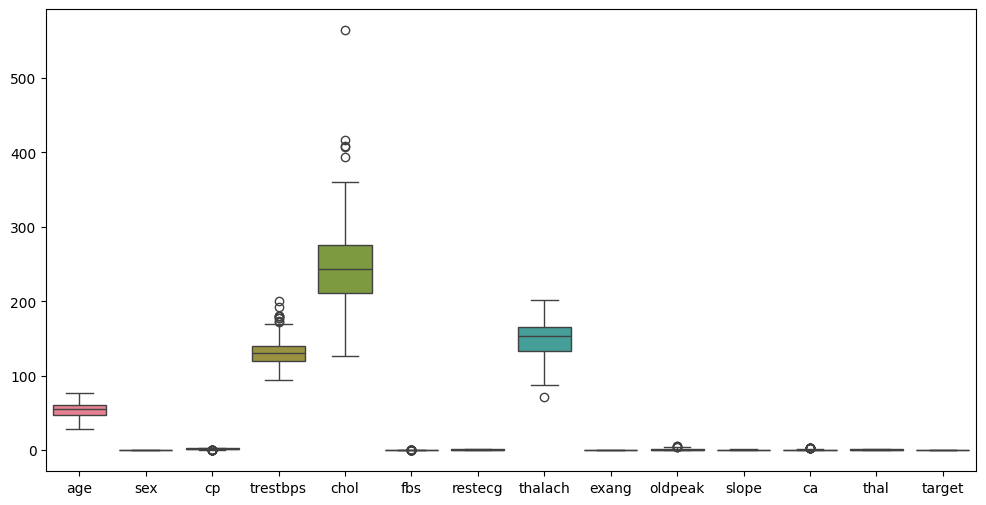

In [37]:
# Boxplot untuk variabel numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.show()

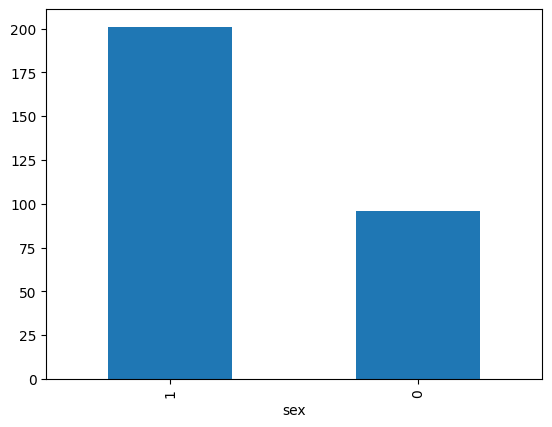

In [8]:
# Bar Chart untuk variabel kategorikal
df['sex'].value_counts().plot(kind='bar')
plt.show()

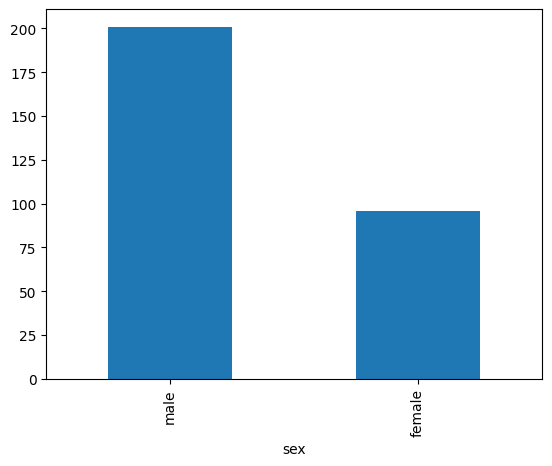

In [10]:
# Ubah data saat plotting tanpa mengubah DataFrame asli
df['sex'].map({0: 'female', 1: 'male'}).value_counts().plot(kind='bar')
plt.show()

## Analisis Korelasi

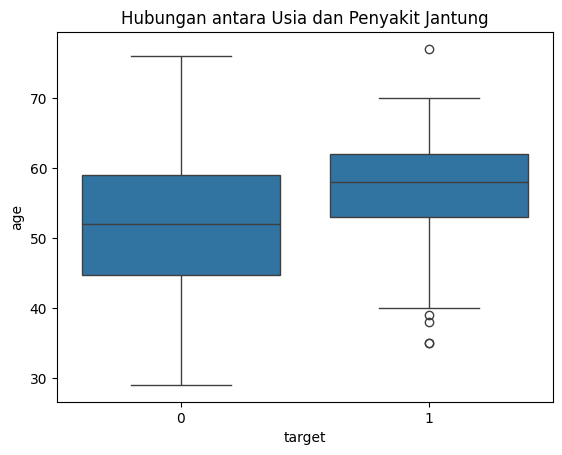

In [38]:
# Hubungan antara usia dan penyakit jantung
sns.boxplot(x='target', y='age', data=df)
plt.title('Hubungan antara Usia dan Penyakit Jantung')
plt.show()


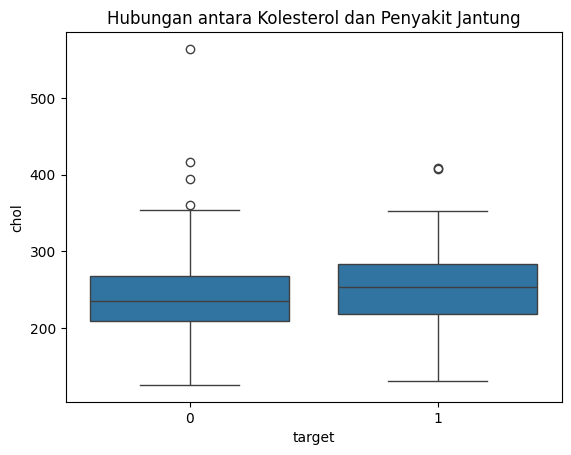

In [39]:
# Hubungan antara kolesterol dan penyakit jantung
sns.boxplot(x='target', y='chol', data=df)
plt.title('Hubungan antara Kolesterol dan Penyakit Jantung')
plt.show()


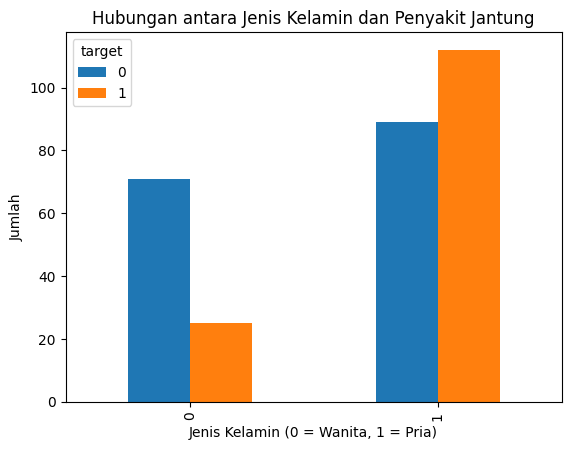

In [40]:
# Crosstab antara jenis kelamin dan penyakit jantung
pd.crosstab(df['sex'], df['target']).plot(kind='bar')
plt.title('Hubungan antara Jenis Kelamin dan Penyakit Jantung')
plt.xlabel('Jenis Kelamin (0 = Wanita, 1 = Pria)')
plt.ylabel('Jumlah')
plt.show()

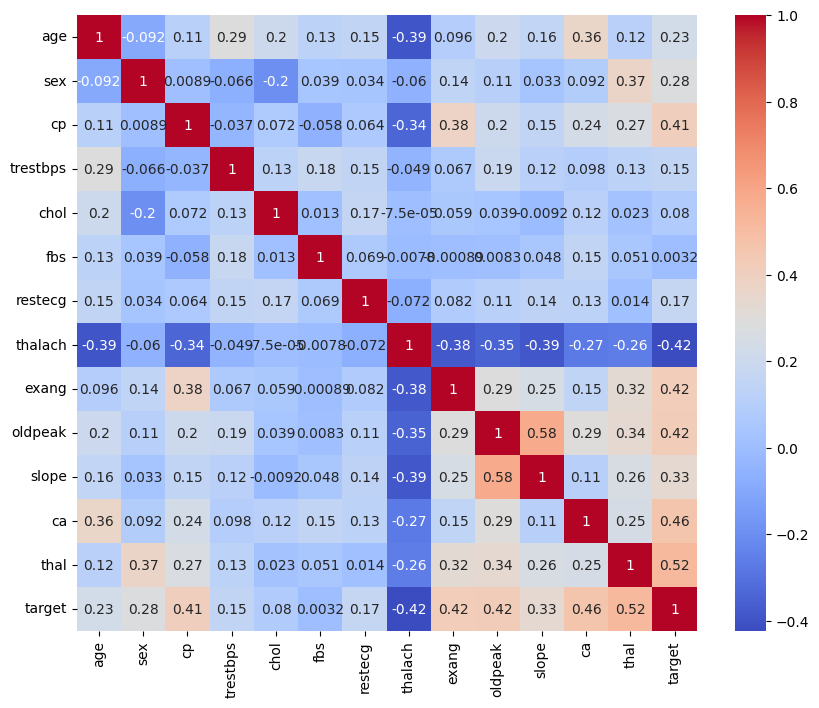

In [43]:
# Heatmap dari Matriks Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Crosstab Result:
 target   0    1
sex            
0       71   25
1       89  112


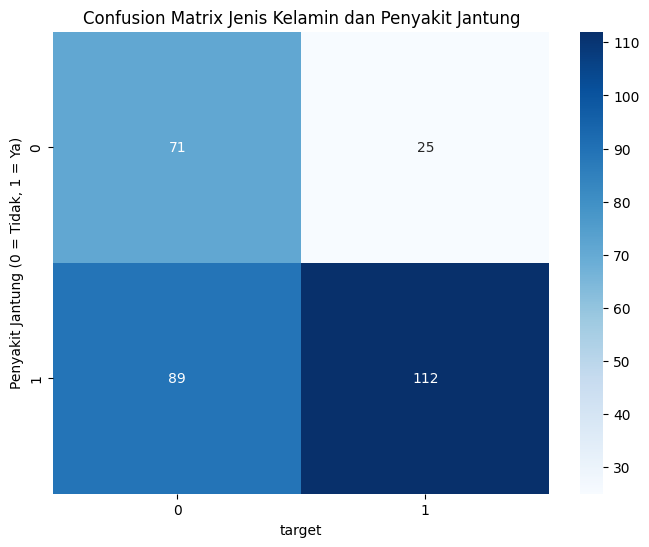

In [44]:
# Crosstab dan Count Plot
crosstab_result = pd.crosstab(df['sex'], df['target'])
print("Crosstab Result:\n", crosstab_result)
# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_result, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.title('Confusion Matrix Jenis Kelamin dan Penyakit Jantung')
plt.show()

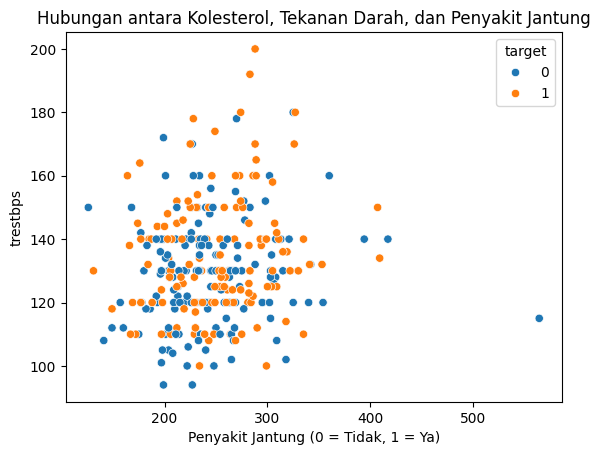

In [45]:
# Hubungan 2 variabel numerik
# Scatter plot antara kolesterol dan tekanan darah terhadap penyakit jantung
sns.scatterplot(x='chol', y='trestbps', hue='target', data=df)
plt.title('Hubungan antara Kolesterol, Tekanan Darah, dan Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.show()

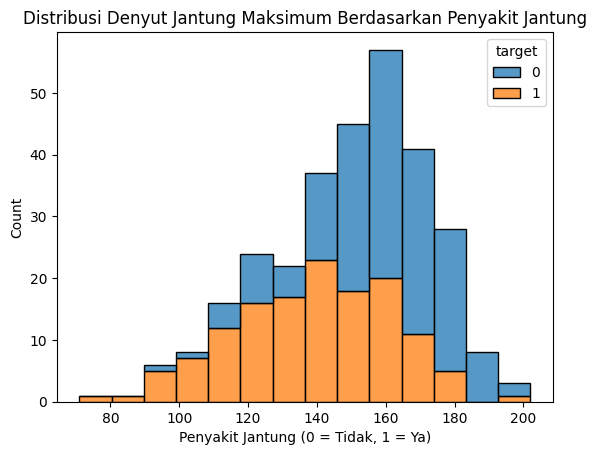

In [47]:
# Distribusi nilai maksimum dari denyut jantung berdasarkan penyakit jantung
sns.histplot(data=df, x='thalach', hue='target', multiple='stack')
plt.title('Distribusi Denyut Jantung Maksimum Berdasarkan Penyakit Jantung')
plt.xlabel('Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.show()

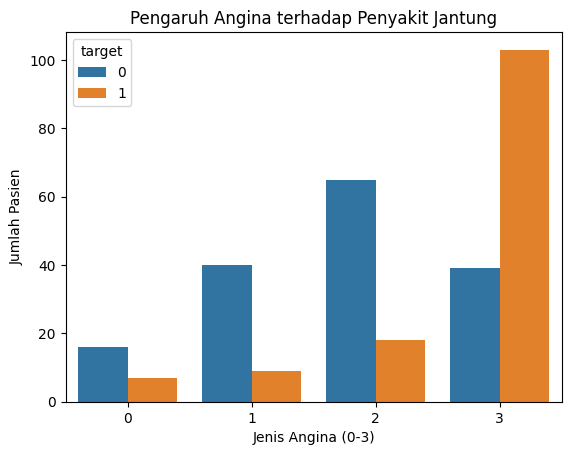

In [46]:
# Analisis tipe angina (pain type)
sns.countplot(x='cp', hue='target', data=df)
plt.title('Pengaruh Angina terhadap Penyakit Jantung')
plt.xlabel('Jenis Angina (0-3)')
plt.ylabel('Jumlah Pasien')
plt.show()

## Feature Engineering & Feature Selection

In [17]:
# Transformasi Data - Normalisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,0.833333,1.0,0.0,0.622642,0.246575,1.0,1.0,0.458015,0.0,0.016129,0.5,0.333333,0.0,0.0
1,0.833333,0.0,0.0,0.433962,0.257991,0.0,0.0,0.610687,0.0,0.290323,0.0,0.666667,0.0,0.0
2,0.770833,0.0,0.0,0.528302,0.228311,0.0,0.0,0.328244,0.0,0.419355,1.0,0.000000,0.0,0.0
3,0.750000,1.0,0.0,0.415094,0.356164,1.0,1.0,0.786260,0.0,0.225806,0.5,0.333333,0.0,1.0
4,0.729167,1.0,0.0,0.150943,0.194064,0.0,1.0,0.557252,1.0,0.290323,0.5,0.000000,0.0,0.0


In [ ]:
# Reduksi Dimensi dengan PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Mengurangi ke 2 dimensi
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PCA1', 'PCA2'])

### Feature Selection

In [54]:
# Definisikan Variabel Parameter dan Variabel Target
# Misalkan X adalah fitur dan y adalah target
X = df.drop(columns='target')  # Semua fitur kecuali target
y = df['target']  # Target

n_features_to_select = 5

In [55]:
# Feature Selection Menggunakan RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model yang akan digunakan dalam RFE
model = LogisticRegression(max_iter=1000)

# RFE dengan Logistic Regression
rfe = RFE(model, n_features_to_select=n_features_to_select)
fit = rfe.fit(X, y)

# Menampilkan fitur yang dipilih
print("Selected Features by RFE:", X.columns[fit.support_])

Selected Features by RFE: Index(['fbs', 'exang', 'slope', 'ca', 'thal'], dtype='object')


In [56]:
# Feature Selection Menggunakan MI (Mutual Information)
from sklearn.feature_selection import mutual_info_classif

# Menghitung MI antara fitur dan target
mi = mutual_info_classif(X, y)

# Menyusun MI dalam DataFrame
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Menampilkan fitur yang dipilih berdasarkan MI
print(mi_df)
# Menampilkan beberapa fitur paling relevan
top_5_features_mi = mi_df.head(n_features_to_select)
print("top 5: ", top_5_features_mi)

     Feature  Mutual Information
12      thal            0.146738
11        ca            0.118458
8      exang            0.108859
2         cp            0.106471
4       chol            0.086189
7    thalach            0.080845
9    oldpeak            0.077143
1        sex            0.066577
10     slope            0.031727
0        age            0.003644
3   trestbps            0.000000
5        fbs            0.000000
6    restecg            0.000000
top 5:     Feature  Mutual Information
12    thal            0.146738
11      ca            0.118458
8    exang            0.108859
2       cp            0.106471
4     chol            0.086189


In [62]:
from sklearn.linear_model import LassoCV
import pandas as pd

# LASSO dengan cross-validation untuk menentukan regularization strength (alpha)
lasso = LassoCV(cv=5).fit(X, y)

# Koefisien yang terkait dengan fitur
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# Menyaring fitur yang memiliki koefisien tidak nol
non_zero_features = lasso_coef[lasso_coef != 0]
selected_features = non_zero_features.index.tolist()
print("Selected Features by LASSO:", selected_features)
print(non_zero_features)

# Mengurutkan fitur berdasarkan nilai koefisien secara menurun
sorted_features = non_zero_features.sort_values(ascending=False)

# Menampilkan 5 fitur paling relevan
top_5_features_lasso = sorted_features.head(n_features_to_select)
print("Top 5 Features by LASSO:")
print(top_5_features_lasso)


Selected Features by LASSO: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
age        -0.001337
sex         0.125160
cp          0.081029
trestbps    0.002048
chol        0.000323
fbs        -0.049407
restecg     0.029929
thalach    -0.003083
exang       0.112893
oldpeak     0.036470
slope       0.046027
ca          0.135848
thal        0.125653
dtype: float64
Top 5 Features by LASSO:
ca       0.135848
thal     0.125653
sex      0.125160
exang    0.112893
cp       0.081029
dtype: float64


In [1]:
# Ensamble Feature Selection (MI, LASSO, RFE)

# Hasil dari RFE
rfe_selected = X.columns[fit.support_]

# Hasil dari MI
mi_selected = mi_df[mi_df['Mutual Information'] > 0.1]['Feature']  # Sesuaikan threshold sesuai kebutuhan

# Hasil dari LASSO
lasso_selected = selected_features

# Menggabungkan fitur yang dipilih oleh semua metode
final_selected_features = set(rfe_selected).intersection(mi_selected).intersection(lasso_selected)
print("Final Selected Features:", final_selected_features)


NameError: name 'X' is not defined

## Identifikasi Pola dan Anomali

In [ ]:
# Scatter plot setelah PCA untuk melihat pola atau kluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca)
plt.show()

## Hipotesis